In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

**Make sure you have the CSV file wherever you are working on this notebook!**



Now let's read the data from the CSV file into a dataframe:

In [2]:
df=pd.read_csv("firearms-combined.csv")

## Effect of State Gun Laws

The column "Total Laws 2014" shows the total number of gun laws in each state as of 2014. The data is from 

https://www.statefirearmlaws.org/resources

Now we have 2 data sources that are both in 2014, but they do not represent two samples from the same population. Instead, they represent two things that may depend on each other.

In [3]:
# Note that I went directly to a numpy array here, instead of making a list first
# The reason for using a numpy array is that we want to apply numpy methods for 
# computing statistics further below!

laws14=np.array(df["Total Laws 2014"])
rate14=np.array(df["RATE-2014"])



Again, the first thing to do is plot the data. When we have two sets of data that may be dependent, a scatter plot is usually the first tool to reach for:

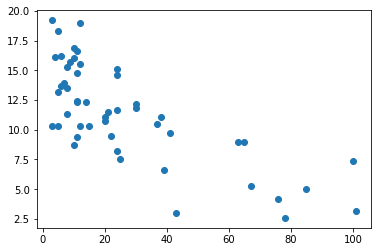

In [4]:
plt.scatter(laws14,rate14)

Text(0, 0.5, 'Firearms Mortality Rate (2014)')

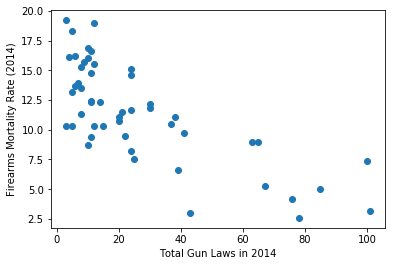

In [5]:
plt.scatter(laws14,rate14)
plt.xlabel("Total Gun Laws in 2014")
plt.ylabel("Firearms Mortality Rate (2014)")

What does this data suggest?

An increase in the number of gun laws seems to be associated with a decrease in firearms mortality rates

We don't know how to measure the dependence between two data sets like this -- **yet**

Let's see if we can turn this into into two data sets:

The data seems to fall into two clusters, one with < 50 laws and one with > 50 laws. 

Finding clusterings of data is a job computers are good at.

Let's use a standard clustering algorithm to see what it find.




Clustering is a type of unsupervised machine learning; unsupervised means that you do not have to have labels for any of the data

### K-means Algorithm

First, let's learn to calculate the centroid of a data set. The centroid is the extension of average to multiple dimensions:

**Definition** Given a data set $S_i$, the centroid is 
$$
m_i = \frac{1}{|S_i|} \sum_{x_j \in S_i} x_j
$$

Here, each sample $x_j$ may be multi-dimensional. For example, we are working with a two-dimensional data set: each point in our plot represents (total gun laws in 2014, firearms mortality rate in 2014) for a state

We can find the centroid for the whole data set as:

In [6]:
centroid_x=np.sum(laws14)/laws14.size
centroid_y=np.sum(rate14)/rate14.size
centroid_x,centroid_y

(26.48, 11.44)

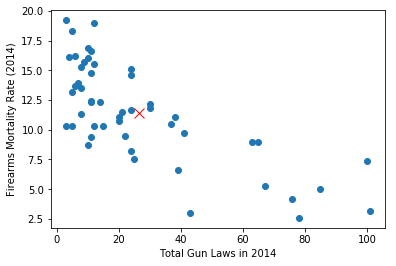

In [7]:
plt.scatter(laws14,rate14)
plt.xlabel("Total Gun Laws in 2014")
plt.ylabel("Firearms Mortality Rate (2014)")
plt.plot(centroid_x,centroid_y,'xr',markersize=10)

How can we apply centroids to cluster data? The $K$-means algorithm is a simple approach

(For reference, see  https://en.wikipedia.org/wiki/K-means_clustering for example)

0. **Initialization** (Forgy): Randomly pick some points in the data set to represent the intitial "centroids"

Iterate:
1. **Assignment** of data points to clusters: Calculate the distances between all the data points and the centroids. Assign each data point to the closest centroid.

If the assignments do not change, then stop.

2. **Centroids Update**: Calculate the new centroids for each cluster based on the updated assignments.

**Return to 1.**

Let's try it. We will extend our notation from before (following Wikipedia's notation):

* $S_{i}^{(t)}$ is the $i$th cluster (subset) in step $t$ of the algorithm
* $m_{i}^{(t)}$ is the centroid of the $i$th cluster in step $t$ of the algorithm


**Inititalization:**


Start by picking two inital data values to represent the initial centroids:





In [8]:
samples=npr.randint(0,50,size=2) #choose again if they are the same!!!
samples                   

array([15, 21])

In [9]:
centroids_x=laws14[samples]
centroids_y=rate14[samples]
centroids_x,centroids_y

(array([ 8, 20]), array([11.3, 11.1]))

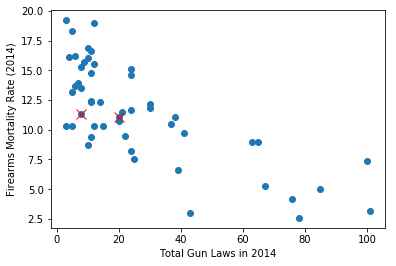

In [10]:
plt.scatter(laws14,rate14)
plt.xlabel("Total Gun Laws in 2014")
plt.ylabel("Firearms Mortality Rate (2014)")
plt.plot(centroids_x,centroids_y,'xr',markersize=10)

**Assignment**

For each data point, determine which centroid is closer. 

In [11]:
d02=(laws14-centroids_x[0])**2+(rate14-centroids_y[0])**2
d12=(laws14-centroids_x[1])**2+(rate14-centroids_y[1])**2

In [12]:
d12>d02

array([ True,  True,  True,  True, False, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True])

In [13]:
1*(d12>d02)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1])

In [14]:
clusters=1*(d12>d02)

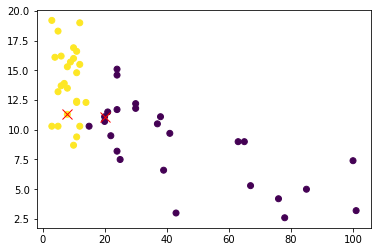

In [15]:
plt.scatter(laws14,rate14,c=clusters)
plt.plot(centroids_x,centroids_y,'xr',markersize=10)

**Update** We compute the new cluster centroids:

How to pull the values out of the array according to the cluster labels? Need to change the cluster numbers into indices to use with *fancy indexing*

In [16]:
np.where(clusters==0)

(array([ 4,  5,  6,  7,  8, 10, 12, 14, 19, 20, 21, 22, 26, 29, 31, 32, 34,
        36, 37, 38, 41, 42, 46, 47, 48]),)

In [17]:
centroids_x=[]
centroids_y=[]
for i in range(2): # 2 clusters
    clusterx=laws14[np.where(clusters==i)]
    clustery=rate14[np.where(clusters==i)]
    centroids_x+=[np.sum(clusterx)/clusterx.size]
    centroids_y+=[np.sum(clustery)/clustery.size]

In [18]:
centroids_x,centroids_y

([44.48, 8.48], [8.831999999999999, 14.048])

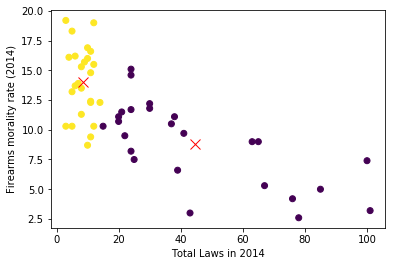

In [19]:
plt.scatter(laws14,rate14,c=clusters)
plt.xlabel("Total Laws in 2014")
plt.ylabel("Firearms morality rate (2014)")
plt.plot(centroids_x,centroids_y,'xr',markersize=10)

The algorithm may require multiple steps before it converges. Different initializations may result in different final clusterings -- the result is not necessarily optimal!

We could code this by hand, but there are several libraries that contain clustering algorithms. 


![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
The ```scikit-learn``` module has many useful methods for machine learning, including clustering

In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) # create creates a k-mean model

In [21]:
law_data=np.vstack((laws14,rate14))
law_data=law_data.T  #transpose (swap rows & columns)
# law_data

In [22]:
kmeans.fit(law_data) # train the model on the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
clusters=kmeans.predict(law_data) #predict the clusters for the data
# the trained model can also be used to predict the clusters for other data, too
# clusters

Text(0, 0.5, 'Firearms morality rate (2014)')

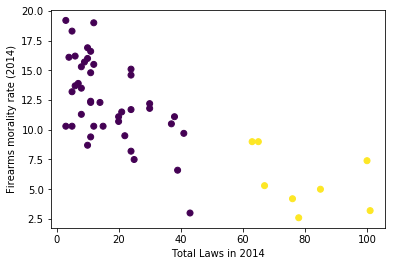

In [24]:
plt.scatter(laws14,rate14,c=clusters)
plt.xlabel("Total Laws in 2014")
plt.ylabel("Firearms morality rate (2014)")

In [25]:
kmeans.cluster_centers_

array([[16.4047619 , 12.53095238],
       [79.375     ,  5.7125    ]])

In [26]:
centroids=kmeans.cluster_centers_

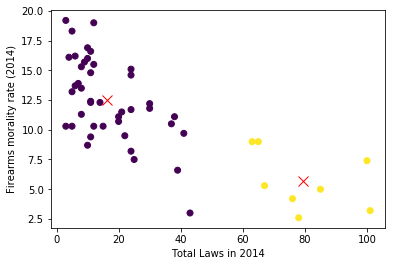

In [27]:
plt.scatter(laws14,rate14,c=clusters)
plt.xlabel("Total Laws in 2014")
plt.ylabel("Firearms morality rate (2014)")
plt.plot(centroids[:,0],centroids[:,1],'xr',markersize=10)

Now let's partition the data accordingly:

In [28]:
less50=rate14[np.where(clusters==0)]
less50.mean(),len(less50)

(12.53095238095238, 42)

In [29]:
more50=rate14[np.where(clusters==1)]
more50.mean(),len(more50)

(5.7125, 8)

In [30]:
law_diff=less50.mean()-more50.mean()
law_diff

6.81845238095238

Again, if we want to perform a binary hypothesis test, we need to pool the data and draw representative samples from it:

In [31]:
all_laws=list(rate14)

In [32]:
all_laws = 
num_sims=100000
event_count=0
bs_stats = []
for sim in range(num_sims):
    sample_less50=npr.choice(all_laws,len(less50))
    sample_more50=npr.choice(all_laws,len(more50))
    sample_diff =sample_less50.mean()-sample_more50.mean()
    bs_stats += [sample_diff]
    if abs(sample_diff) >= law_diff:
        event_count+=1



print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  2e-05


What is your conclusion?

There is an association between the number of gun laws and the firearms mortality rate. More gun laws are associated with lower firearms mortality rates

What are some issues with this analysis?

The number of gun laws passed by a state may depend on factors that also affect firearms mortality, such as
1. rural or urban
2. education levels
3. poverty levels

We can say that having more gun laws is **associated** with lower firearms mortality, but we cannot say that it **causes** lower firearm mortality

A more careful statistical analysis would have to **control** for these other variables when measuring the effects of gun laws on firearms mortality

**Lecture 12 Assignment** 

Find the 99% confidence interval for the difference in means between these data sets. Discuss whether the confidence interval supports the hypothesis that the states with more than 50 gun laws have a lower  firearms mortality rate than the states with fewer than 50 gun laws

In [33]:
bs_stats.sort()
lower=int(len(bs_stats)*0.01/2)
upper=int(len(bs_stats)-lower-1)
bs_stats[lower],bs_stats[upper]
print('The 99% confidence interval is [',bs_stats[lower],', ',bs_stats[upper],'].',sep="")

The 99% confidence interval is [-3.951190476190476, 4.107142857142856].


The confidence interval supports the hypothesis that the states with more than 50 gun laws have a lower firearms mortality rate than states with 50 gun laws as 99 pecent of random distributions are within 4.14%, and in our difference we found that it was 6.81%. This is significantly higher than 4.14% as well, so this is especially anomalous.